### <b>[RQ4]</b> In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.

<b>4.1</b> Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [2]:
#Data upload (posts.csv: 42,710.197 rows)
columns_posts = ["post_id","profile_id", "numbr_likes", "number_comments", "cts"]
df_posts_RQ4 = pd.read_csv("~/instagram_posts.csv", sep = "\t" , usecols = columns_posts , parse_dates=["cts"])

In [3]:
#Data upload (profiles.csv: 4,509.586 rows)
columns_profiles = ["profile_id","following","followers"]
df_profiles_RQ4 = pd.read_csv("instagram_profiles.csv", sep = "\t" , usecols = columns_profiles)

* Due to the multiple exercise requirements that involve combining differents datasets together, we are going to focus our analysis on those profile_id that are present in both posts.csv and profiles.csv. Also, we want to remove all rows containing NaNs:

In [5]:
df_profiles_RQ4 = df_profiles_RQ4[df_profiles_RQ4.profile_id.isin(df_posts_RQ4.profile_id.unique())] #2,207.207
df_posts_RQ4 = df_posts_RQ4[df_posts_RQ4.profile_id.isin(df_profiles_RQ4.profile_id)] #27,715.738 rows
df_posts_RQ4 = df_posts_RQ4.dropna() #25,132.446 rows

* The created function takes as <b>input</b>: the queried profile_id , an array of profile_ids and an array of post_ids. <br> As an <b>output</b>, it returns: a list containing all posts_id of the queried profile_id:

In [9]:
def posts(query_id, profile_id = df_posts_RQ4.profile_id.values , post_id = df_posts_RQ4.post_id.values):
    return post_id[profile_id == query_id]

<b>4.2</b> Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function. <br>

* Before defining the function, we leverage <i>np.unique</i> method to create an array with <b>all unique profile_ids</b> that appear in <b>posts.csv</b> and another one containing their <b>frequency of appareance</b>. Then, we create a <b> sorted dataframe by posting frequency</b>.

In [74]:
unique_ids ,number_of_posts = np.unique(df_posts_RQ4.profile_id.values, return_counts=True)
post_per_profile = pd.DataFrame({'profile_id': unique_ids, 'number_of_posts': number_of_posts})
sorted_posters = post_per_profile.sort_values(by = 'number_of_posts' , ascending = False)
sorted_posters.head(10)

,profile_id,number_of_posts
1588423,5.421037e+09,599
2165315,1.287812e+10,586
2172742,1.347814e+10,557
2165889,1.296135e+10,526
1603569,5.515448e+09,450
1222351,2.243212e+09,450
1525258,4.575459e+09,384
74789,1.029414e+07,362
514565,2.682094e+08,357
160715,2.365051e+07,345


* This function takes as an <b>input</b>: an integer <i>n</i> , which specifies the queried <b>top n most frequent posters</b>, and the <b>sorted array</b> of profile_ids <b>by their number of posts made</b>. It returns as an <b>output</b> a list of arrays containing the post_id of the top n more frequent posters (as we use the previously coded </i>posts()</i> function).

In [54]:
def top_n_post(n,data = sorted_posters.profile_id.values):
    return [posts(i) for i in data[0:n]] 

<b>4.3</b> What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?<br>

* We first create a new dataframe by merging the top 10 ids with their associated data in profiles.csv, but we remove <i>post_id</i> and <i>cts</i> columns as they are not needed now.

In [39]:
profile_ids_likes_comments = pd.merge(sorted_posters[["profile_id"]].head(10), df_posts_RQ4df_posts_RQ4, on= 'profile_id')
profile_ids_likes_comments.drop(['post_id', 'cts'], axis=1 , inplace = True)

* Then, we group this new dataframe by <i>profile_id</i> and aggregate the mean values of both comments and likes for each user. Then we compute the overall mean over both columns in a call to print.

In [68]:
top_average_likes_comments = profile_ids_likes_comments.groupby("profile_id").aggregate("mean")
print("The average number of likes of the top 10 profiles with the highest number of posts is", 
round(top_average_likes_comments.numbr_likes.mean(),2), "likes, and their average number of comments is",
round(top_average_likes_comments.number_comments.mean(),2),". The dataframe below shows their individual average data:")
top_average_likes_comments

The average number of likes of the top 10 profiles with the highest number of posts is 600.1 likes, and their average number of comments is 16.63 . The dataframe below shows their individual average data:


,numbr_likes,number_comments
profile_id,,
1.029414e+07,3138.977901,111.060773
2.365051e+07,247.023188,7.959420
2.682094e+08,1931.731092,31.114846
2.243212e+09,636.502222,15.488889
4.575459e+09,19.434896,0.018229
5.421037e+09,10.373957,0.263773
5.515448e+09,8.173333,0.073333
1.287812e+10,2.174061,0.114334
1.296135e+10,3.091255,0.098859


<b>4.4</b> Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

* We first add an <i>hour</i> column to the posts.csv based on the <i>cts</i> column.
* Then we create a new data set that includes only the top 10 highest posters and their hours of posting.

In [88]:
warnings.filterwarnings("ignore")
df_posts_RQ4["hour"] = pd.DatetimeIndex(df_posts_RQ4['cts']).hour
times_top_users = df_posts_RQ4[df_posts_RQ4.profile_id.isin(top_average_likes_comments.index)]
times_top_users.drop(['post_id', 'cts','numbr_likes','number_comments'], axis=1 , inplace = True)
times_top_users

,profile_id,hour
7436,4.575459e+09,9
28906,2.243212e+09,13
40126,1.029414e+07,22
40171,1.029414e+07,22
40603,2.682094e+08,21
...,...,...
42638925,5.515448e+09,7
42653456,2.243212e+09,15
42658112,1.296135e+10,10
42669635,2.365051e+07,14


* Finally, we leverage the function created in RQ.3 for plotting the posting times of the 10 top users.
* As we can observe in the chart, it is clear that the slot with the highest amount of posts is between 20h and 23h, which intuitevely makes sense, as within these hours people are usually not at work or school anymore, but rather enjoying their free time. On the counterpart, the intervals with less posts are between 0h and 5h, which obviously is when people are already sleeping. 

The total number of posts of the top 10 "posters"  for each given interval


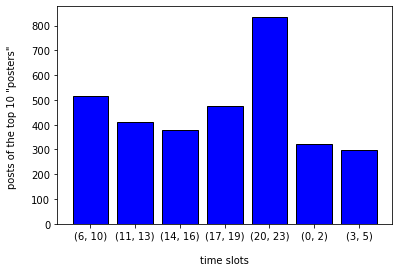

In [95]:
slots = [(6, 10), (11, 13), (14, 16), (17, 19), (20, 23), (0, 2), (3, 5)]
time_intervals(times_top_users, times_top_users.hour, slots , """posts of the top 10 "posters" """)

### <b>[RQ5]</b> The most influential users are the ones with the highest number of “followers", you can now look more into their activity.


<b>5.1</b> Plot the top 10 most popular users in terms of followers and their number of posts.


In [35]:
# posts dataset
fields=['profile_id','location_id','post_type','numbr_likes','number_comments']
df_instagram_posts_RQ5=pd.read_csv('~/instagram_posts.csv',sep='\t',usecols=fields)

In [36]:
#profiles dataset
df_instagram_profiles_RQ5 = pd.read_csv('https://adm2022.s3.amazonaws.com/instagram_profiles.zip', delimiter='\t')

In [37]:
#locations dataset
df_instagram_locations_RQ5 = pd.read_csv('https://adm2022.s3.amazonaws.com/instagram_locations.zip', delimiter='\t')

* We start by extracting the top 10 most followed accounts

In [38]:
followers=df_instagram_profiles_RQ5['followers']
followers.nlargest(10)

2880218    285457645.0
2582507     65269440.0
3820939     35339708.0
701965      30689316.0
2414951     30246783.0
2785241     29542143.0
333193      29176804.0
3934581     29042823.0
1311970     26476004.0
1703764     26252169.0
Name: followers, dtype: float64

* We show the dataset of the top 10 most influential users

In [39]:
#top10 profiles by followers
top10=df_instagram_profiles_RQ5[df_instagram_profiles_RQ5.followers >= 26252169.0]
top10.sort_values(['followers'],ascending=False)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,2.502532e+07,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False
2582507,371414,3.416684e+06,victoriassecret,Victoria's Secret,Confidence is sexy. #wearitdaily,549.0,65269440.0,7355.0,like2b.uy/victoriassecret,NaN,True
3820939,337097,2.082449e+07,nba,NBA,"30 teams, 1 🏆\n👟: @nbakicks \n📽: @nbahistory \...",817.0,35339708.0,28816.0,nba.app.link/js6X7SVaxT,NaN,True
701965,330376,1.876191e+08,louisvuitton,Louis Vuitton Official,The official Instagram account of Louis Vuitton.,5.0,30689316.0,3352.0,on.louisvuitton.com/Like2Buy,NaN,True
2414951,292359,2.125507e+09,buzzfeedtasty,Tasty,"Recipes that will make you say ""oh yes!""\n👇 Cl...",298.0,30246783.0,2791.0,tasty.co/linkinbio,NaN,True
2785241,3437294,4.968651e+08,andresiniesta8,Andres Iniesta,"Andres Iniesta Official Instagram Account, \nB...",151.0,29542143.0,990.0,mikakus.com,2019-05-08 23:54:35.377 -0400,False
333193,158690,2.341008e+07,hm,H&M,Welcome to #HM! Follow us at @HM_Man @HM_Kids ...,403.0,29176804.0,4566.0,hm.info/1c9he,2018-05-31 19:33:46.022 -0400,True
3934581,3615154,2.423993e+07,princessyahrini,Syahrini,NaN,835.0,29042823.0,4719.0,www.youtube.com/c/ThePrincesSyahrini,2019-06-26 15:05:53.411 -0400,True
1311970,508140,5.041706e+07,danbilzerian,Dan Bilzerian,Snapchat: dbilzerian,252.0,26476004.0,1311.0,www.ignite.co,NaN,True
1703764,3513205,9.070254e+08,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False


* We now create a barplot showing the number of followers for each one of the most influential users

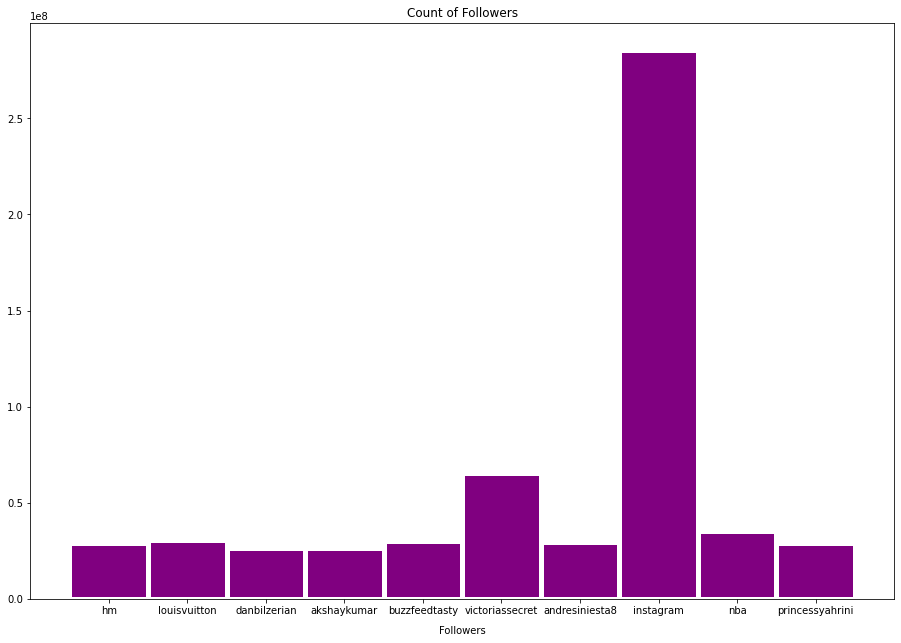

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
profiles = list(top10['profile_name'])
nfollows = list(top10['followers'])
ax.bar(profiles,nfollows,width=1, edgecolor="white", linewidth=5,color='purple')
plt.xlabel('Followers',labelpad=10)
plt.ylabel('',labelpad=10)
plt.title('Count of Followers')
plt.show()

<b>5.2</b> Who is the most influential user?


In [42]:
#most influential user
df_instagram_profiles_RQ5[df_instagram_profiles_RQ5.followers == 285457645.0] 

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False


* The most influential user is <b>Instagram


<b>5.3</b> Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

* We create a dataframe containing all the posts by the top 10 most influential users

In [44]:
top10_posts=pd.DataFrame(columns=['profile_id'])
for i in [23410080.0,187619120.0,50417061.0,907025384.0,2125506698.0,3416684.0,496865116.0,25025320.0,20824486.0,24239929.0]:
    x=df_instagram_posts_RQ5[df_instagram_posts_RQ5['profile_id']==int(i)]
    top10_posts=pd.merge(top10_posts,x,how='outer')
print(top10_posts)

      profile_id   location_id  post_type  numbr_likes  number_comments
0     23410080.0  3.846191e+08          1     116059.0            642.0
1     23410080.0  2.293029e+08          1      46368.0             88.0
2    187619120.0  5.590714e+06          1     186857.0            867.0
3     50417061.0  2.222444e+08          1     266200.0           3290.0
4     50417061.0  2.368281e+08          1     268732.0           6402.0
..           ...           ...        ...          ...              ...
136   24239929.0  2.130118e+08          1      55010.0              0.0
137   24239929.0  2.130118e+08          1     114315.0              0.0
138   24239929.0  2.130118e+08          1      78974.0              0.0
139   24239929.0  1.906910e+15          1     132116.0              0.0
140   24239929.0  1.906910e+15          1      66185.0              0.0

[141 rows x 5 columns]


* We extract the location_id of each post by top10_posts, then we create a list containing the output.
* We then procede to create top10_loc, a dataframe containing all the locations tagged by the top10 users

In [46]:
loc_id= top10_posts['location_id']
loc_id.apply(lambda x: format(x, 'f'))

0             384619115.000000
1             229302869.000000
2               5590714.000000
3             222244450.000000
4             236828105.000000
                ...           
136           213011753.000000
137           213011753.000000
138           213011753.000000
139    1906910439594849.000000
140    1906910439594849.000000
Name: location_id, Length: 141, dtype: object

In [51]:
cc=[i for i in loc_id]
top10_loc=pd.DataFrame(columns=['sid','name','city'])


#dataframe containing all the locations tagged by the top10 users

for i in range(len(df_instagram_locations_RQ5)):
    if df_instagram_locations_RQ5['id'][i] in cc:
        x=df_instagram_locations_RQ5[df_instagram_locations_RQ5.id == df_instagram_locations_RQ5['id'][i]]
        top10_loc=pd.merge(top10_loc,x,how='outer')

* We now print the locations visited by the top 10 accounts and we group them by city, then we count how many times wach city was visited.

In [52]:
top10_loc_groups=top10_loc.groupby(['city'])['city'].count()

In [53]:
top10_loc_groups

city
Adelaide, South Australia    1
Akron, Ohio                  1
Amphoe Pak Chong             1
Amsterdam, Netherlands       3
Bad Urach                    1
                            ..
Vail, Colorado               1
Vaitape, French Polynesia    1
Valencia                     1
Valley Park, Missouri        1
Xiandu, Zhejiang, China      1
Name: city, Length: 63, dtype: int64

* In the following plot we can observe the number of times each city has been tagged by one of the top 10 most influential users of Instagram;
Only the cities visited more than one time are plotted.

In [52]:
freq=list(acg)
dd=[]
for i in freq:
    if i != 1:
        dd.append(i)
city=['Amsterdam, Netherlands','Houston, Texas','Las Vegas, Nevada','London, United Kingdom','Los Angeles, California ','New York, New York','Shanghai, China','Singapore']

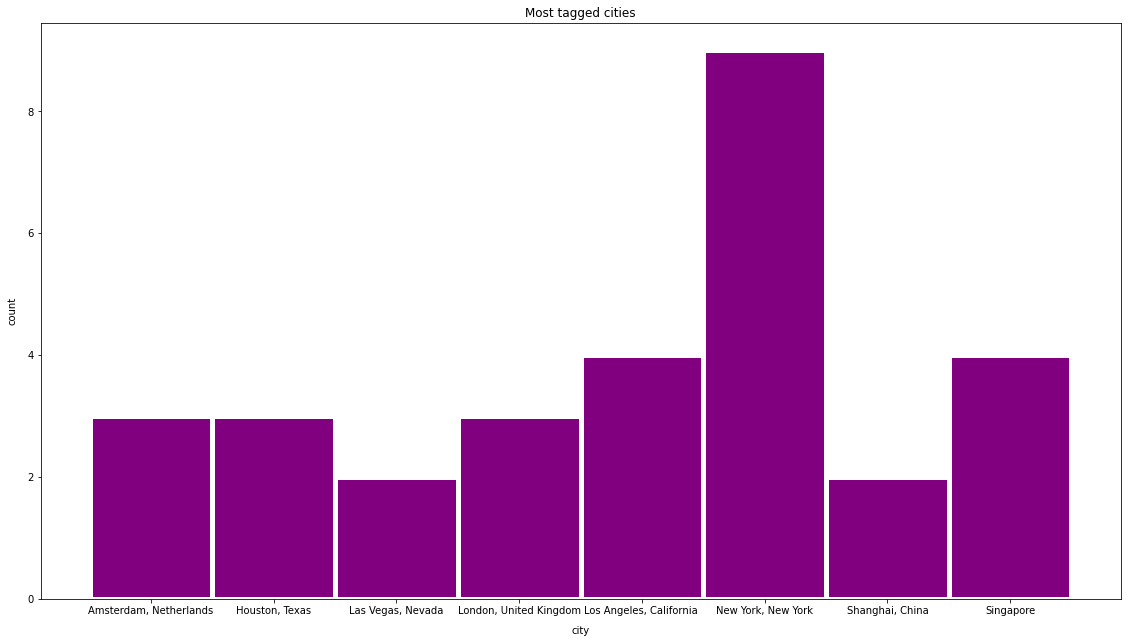

In [53]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2])
ax.bar(city,dd,width=1, edgecolor="white", linewidth=5,color='purple')
plt.xlabel('city',labelpad=10)
plt.ylabel('count',labelpad=10)
plt.title('Most tagged cities')
plt.show()

* The most tagged location by top 10 most influential users is <b>New York</b>, which has been visited 9 times, followed by Los Angeles and Singapore with 4 visits, then Amsterdam,
Houston and London 3 times, and finally Las Vegas and Shangai 2 times.

All the other cities have been visited only once

<b>5.4.1</b> How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents?

* After applying the 'groupby' function to the dataframe containing the most influential users, we notice that we have 141 posts made by them in our posts dataset; 
* Of these posts, <b>128 are pictures-only posts</b>, and <b>13 are reel</b> and <b>0 are with both content</b>.

In [53]:
top10_posts.groupby(['profile_id','post_type'])["numbr_likes"].count()
ptype=top10_posts.groupby(['post_type'])["numbr_likes"].count()
ptype

post_type
1    128
2     13
Name: numbr_likes, dtype: int64

<b>5.4.2</b> Provide the number as percentages and interpret those figures.

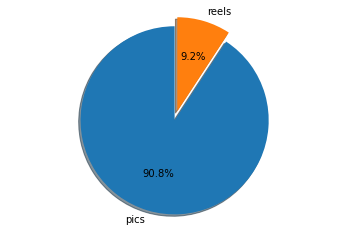

In [54]:
pic=128/141
reel=13/141
pic*100,reel*100

labels = 'pics', 'reels'
sizes = [128,13]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* After observing the plot, we can say that pictures-only posts are the vast majority of the total, being <b>90.8%</b>, and reels appear approximately once every 10 posts (<b>9.2%)

<b>5.5</b> How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

* We start by analizing the posts made by the top 10 most influencial users.
* When they post a picture, they get on average 541294 likes and 3883 comments, while when they post reels <b>they get on average 266.524.1 likes and 2.019.8 comments</b>.
Since we don't have data regarding their mixed posts, we can't say what is the average number of likes and comments for those types of posts.

In [57]:
top10_posts.groupby(['post_type'])["numbr_likes"].mean()

post_type
1    541294.015625
2    266524.153846
Name: numbr_likes, dtype: float64

In [56]:
top10_posts.groupby(['post_type'])["number_comments"].mean()

post_type
1    3882.914062
2    2019.846154
Name: number_comments, dtype: float64

* On the other hand, if we analize all the users, with any number of followers, we obviously get smaller outputs for average likes and comments. 
* The average number of likes <b>for a picture-only post</b>, considering all the posts we can analize, is <b>280.6, while for comments is 390.8 </b>.
* <b>For reels, the average likes and comments are 390.8 and 11.2 respectively</b>.
* We can now dispose also of <b>the mixed posts data</b>, and we observe that they receive <b>an average of 194.7 likes and 6.7 comments</b>.
* The biggest difference between the most influential users and all the users, is that they receive more likes and comments on average on only_pictures post, while regular users receive more likes and comments on average on the reels.

In [59]:
df_instagram_posts_RQ5.groupby(['post_type'])["numbr_likes"].mean()

post_type
1    280.659566
2    390.781299
3    194.758812
Name: numbr_likes, dtype: float64

In [58]:
df_instagram_posts_RQ5.groupby(['post_type'])["number_comments"].mean()

post_type
1     7.498260
2    11.179689
3     6.701434
Name: number_comments, dtype: float64

### [RQ6] It's time to get information from the user posting effectiveness.

<b>6.1.1</b> What is the average time (days and minutes) a user lets pass before publishing another post?

* We grouped the data by "profile_id" and also add three new columns: cts max, cts min, and cts count per user. Then, we remove those users who only posted one post, as they are not relevant for our analysis (140.762 users). Finally, we create a new column called mean_time that has the average time between posts for each user.

In [100]:
data_grouped = df_posts_RQ4.groupby("profile_id").aggregate({'cts':["max", "min", "count"]})
data_grouped =  data_grouped[data_grouped.cts["count"] > 1]
data_grouped["average_time_between_posts"] = (data_grouped.cts['max'] - data_grouped.cts['min']) / (data_grouped.cts['count']-1)
data_grouped

cts                            \
                             max                 min count   
profile_id                                                   
4.000000e+00 2019-05-05 08:03:36 2010-07-22 12:19:51    37   
1.900000e+01 2019-04-17 07:44:13 2010-10-23 18:48:33    51   
2.800000e+01 2019-04-16 05:10:12 2011-02-19 20:16:29    92   
3.300000e+01 2013-03-30 22:35:38 2011-04-30 06:13:46     2   
3.400000e+01 2019-07-01 20:49:50 2011-07-29 06:24:16    20   
...                          ...                 ...   ...   
1.499738e+10 2019-07-11 04:25:20 2019-07-09 03:18:33    12   
1.501918e+10 2019-07-21 14:05:34 2019-06-19 13:17:00     5   
1.523330e+10 2019-06-27 00:11:09 2019-06-26 23:56:47     3   
1.566695e+10 2019-08-06 01:01:31 2019-07-29 21:36:32    11   
9.001013e+13 2018-04-04 09:53:28 2017-06-22 10:56:54    10   

              average_time_between_posts  
                                          
profile_id                                
4.000000e+00  89 days 03:12:52.916666666  
1.900000e+01     61 days 22:49:06.800000  
2.800000e+01  32 days 17:14:26.186813186  
3.300000e+01           700 days 16:21:52  
3.400000e+01 152 days 08:20:17.578947368  
...                                  ...  
1.499738e+10   0 days 04:27:53.363636363  
1.501918e+10      8 days 00:12:08.500000  
1.523330e+10             0 days 00:07:11  
1.566695e+10      0 days 17:08:29.900000  
9.001013e+13  31 days 18:32:57.111111111  

[2033081 rows x 4 columns]

* Then we compute the mean over the <i>average_time_between_posts</i> column
* The average time between posts varies depending on which users we consider for the analysis. 
If we consider all ids from the posts.csv we obtain a mean of 76 days 17 hours and 06 minutes.
While if we compute the mean only for those profile_ids who appear in both datasets, the mean is of 30 days 02 hours and 07 minutes.

In [101]:
average_time_between_posts = data_grouped["average_time_between_posts"].mean()
print("The average time between posts per user is" , str(average_time_between_posts)[0:7],str(average_time_between_posts)[8:10],"hours and",str(average_time_between_posts)[11:13],"minutes.")

The average time between posts per user is 30 days 02 hours and 07 minutes.


<b>6.1.2</b> Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

* By merging the data obtained in 6.1.1 with profiles.csv, we obtain a new dataframe in which we have all the relevant information to our plot (average time between posts, followers and followings), which  we sort (by ascending average_time_between_posts). Also, we remove those rows who have Nan values in their followers and followings(73.531 rows), as we would not be able to plot them as it is required by the exercise.

In [114]:
warnings.filterwarnings("ignore")
average_times = data_grouped.iloc[: , [2,3]]
mean_times_followings_followers = pd.merge(average_times, df_profiles_RQ4, on='profile_id')
mean_times_followings_followers.rename(columns=''.join, inplace=True)
mean_times_followings_followers = mean_times_followings_followers.dropna()
mean_times_followings_followers.sort_values(by = 'average_time_between_posts' , ascending = True).head(9150)

,profile_id,ctscount,average_time_between_posts,following,followers
1039291,1.823732e+09,2,0 days 00:00:00,1009.0,30.0
1951819,1.036093e+10,2,0 days 00:00:00,5115.0,149.0
59496,8.801686e+06,2,0 days 00:00:00,1572.0,705.0
1617198,6.324740e+09,2,0 days 00:00:00,1377.0,288.0
1900802,9.197905e+09,2,0 days 00:00:00,30.0,37.0
...,...,...,...,...,...
1903288,9.224064e+09,12,0 days 00:01:00.454545454,816.0,50.0
1245612,3.141811e+09,12,0 days 00:01:00.454545454,832.0,92.0
1834052,8.542995e+09,7,0 days 00:01:00.500000,160.0,112.0
1772639,8.028836e+09,3,0 days 00:01:00.500000,1196.0,272.0


* Then, we extract the top 3 users by less average_time_between_posts, with their respective followings and followers.

In [108]:
top_3_most_freq = mean_times_followings_followers.sort_values(by = 'average_time_between_posts' , ascending = True).head(3)
top_3_most_freq.average_time_between_posts = pd.to_numeric(top_3_most_freq.average_time_between_posts)
top_3_most_freq

,profile_id,ctscount,average_time_between_posts,following,followers
1039291,1.823732e+09,2,0,1009.0,30.0
1951819,1.036093e+10,2,0,5115.0,149.0
59496,8.801686e+06,2,0,1572.0,705.0


* The top 3 most-frequent posters have an </b>average time between posts</b> of <b>0</b>. This means that they have posted all their posts at the same time, which intuitevely makes no sense. As a matter of fact, up to the 9150 most-frequent posters have an average time between posts of <b>less than a minute</b>, and from there, we can observe in the sorted data a progressive and very <b>smooth increase in the average time</b>. Therefore, as there are not "sudden" shifts in the average time right after those users with 0 time, we can't just ommit those profiles for the analysis and "jump" to the next ones.
* Moreover, as both the followings and the followers don't follow any clear pattern of behaviour among the three users, we conclude that <b>we can't obtain any insighful information from this chart</b>.

<AxesSubplot:xlabel='average_time_between_posts', ylabel='followers'>

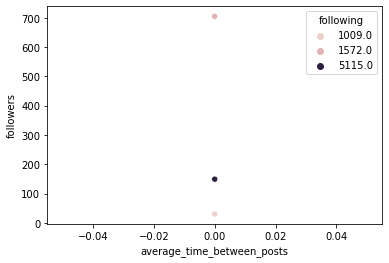

In [109]:
sns.scatterplot(data = top_3_most_freq , x="average_time_between_posts" , y= "followers", hue = "following",legend = "full")

<b>6.2</b> Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

* In order to obtain the average likes and comments, we can use the previously coded function, but adjusting the operation performed over each time interval, in this case we need the mean() instead of the len().

In [127]:
slots = [(6, 10), (11, 13), (14, 16), (17, 19), (20, 23), (0, 2), (3, 5)]

def time_intervals_avg(data, time, time_intervals_list, keyword):
    
    time_results = {}
    for slot in time_intervals_list:
        result = (data[(time >= slot[0]) & (time < slot[1])]).mean() #there is a mean instead of a count
        time_results[str(slot)] = result
    
    plt.bar(list(time_results.keys()), time_results.values(), color = 'blue', ec = 'black', width = 0.8)
    plt.xlabel("time slots", labelpad = 14)
    plt.ylabel(keyword, labelpad = 14)
    plt.title(print("The total number of", keyword, "for each given interval"), y = 1.05)
    plt.show() 

* We can observe similar outputs in both average likes and comments barplots, and also not big differences among the time intervals, in both cases. 
* As shown in both barplots, from 17h to 19h is when people interact more with other users. We interpret that at these time interval, most people are conducting their <b>last hours of their working or studying obligations</b>, therefore they are <b>more inclined to check social media and interact with other users</b>. This can be related with our extracted insights from RQ4.4: from 20-23 users posts the mosts, because <b>most users are already enjoying their free time</b> and <b>have the time to post</b>, which usually takes more time than just interacting (liking and commenting other users' posts).

The total number of likes for each given interval


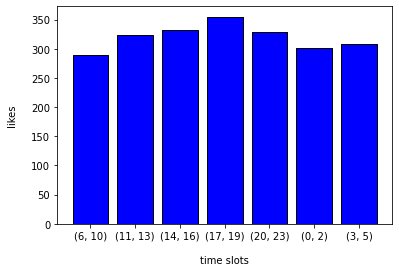

The total number of comments for each given interval


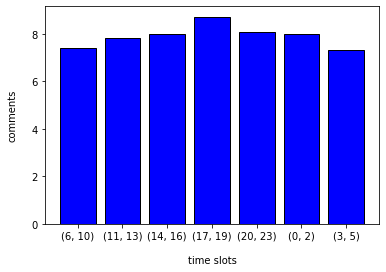

In [129]:
time_intervals_avg(df_posts_RQ4.numbr_likes.values, df_posts_RQ4.hour, slots , "likes")
time_intervals_avg(df_posts_RQ4.number_comments, df_posts_RQ4.hour, slots, "comments")